In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy
import scipy.io
import soundpy as sp
import sounddevice

speech_data = scipy.io.loadmat('project1.mat')
fs = speech_data['fs'][0]
speech_desired = speech_data['reference'][0]
speech_noisy = speech_data['primary'][0]

In [2]:
# NLMS 

filter_order = 10

weight_filter = np.zeros((filter_order))

step_size = 0.05 # step_size

weight_store = []

for n in range (filter_order-1, speech_desired.shape[0]):
    e_n = speech_desired[n] - np.dot(weight_filter, speech_noisy[n-filter_order+1:n+1][::-1])
    weight_filter = weight_filter + step_size * speech_noisy[n-filter_order+1:n+1][::-1] * e_n / (np.linalg.norm(speech_noisy[n-filter_order+1:n+1]) ** 2 + 1e-5)
    weight_store.append(weight_filter)
    
weight_store = np.array(weight_store)
NLMS_weight = weight_store[-1]

In [3]:
# APA1
sample_size = 50

step_size = 0.005

filter_order = 10

weight_filter = np.random.normal(0, 0.1, filter_order)

weight_APA1_store = []

for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
    window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
    window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])
    
    weight_filter = weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)
    
    weight_APA1_store.append(weight_filter)

weight_APA1_store = np.array(weight_APA1_store)
APA1_weight = weight_APA1_store[-1]

In [4]:
# APA2
step_size = 0.005
sample_size = 50
delta = 0.001
add_item = np.eye(sample_size) * delta
step_size = 0.1
filter_order = 10

weight_filter = np.random.normal(0, 0.1, filter_order)

weight_APA2_store = []

for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
    window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
    window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])
    
    weight_filter = weight_filter + step_size * window_filter_x.T @ np.linalg.inv(window_filter_x @ window_filter_x.T + add_item) @ (window_filter_y - window_filter_x @ weight_filter)
    
    weight_APA2_store.append(weight_filter)

weight_APA2_store = np.array(weight_APA2_store)
APA2_weight = weight_APA2_store[-1]

In [5]:
# APA3
sample_size = 50

step_size = 0.001
filter_order = 10

lamda = 10
weight_filter = np.random.normal(0, 0.1, filter_order)

weight_APA3_store = []    

for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
    window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
    window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])
    
    weight_filter = (1-step_size * lamda) * weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)
    
    weight_APA3_store.append(weight_filter)

weight_APA3_store = np.array(weight_APA3_store)
APA3_weight = weight_APA3_store[-1]

In [6]:
# APA4
sample_size = 50
delta = 0.001
add_item = np.eye(sample_size) * delta
step_size = 0.1
filter_order = 10

weight_filter = np.random.normal(0, 0.1, filter_order)

weight_APA4_store = []

for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
    window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
    window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])
    
    weight_filter = (1 - step_size) * weight_filter + step_size * window_filter_x.T @ np.linalg.inv(window_filter_x @ window_filter_x.T + add_item) @ window_filter_y
    
    weight_APA4_store.append(weight_filter)
    
weight_APA4_store = np.array(weight_APA4_store)
APA4_weight = weight_APA4_store[-1]

In [7]:
# filter_output
filter_order = 10
NLMS_output = []
APA1_output = []
APA2_output = []
APA3_output = []
APA4_output = []
for i in range (filter_order-1, speech_desired.shape[0]):
    NLMS_output.append(np.dot(NLMS_weight, speech_noisy[i-filter_order+1:i+1][::-1]))
    APA1_output.append(np.dot(APA1_weight, speech_noisy[i-filter_order+1:i+1][::-1]))
    APA2_output.append(np.dot(APA2_weight, speech_noisy[i-filter_order+1:i+1][::-1]))
    APA3_output.append(np.dot(APA3_weight, speech_noisy[i-filter_order+1:i+1][::-1]))
    APA4_output.append(np.dot(APA4_weight, speech_noisy[i-filter_order+1:i+1][::-1]))

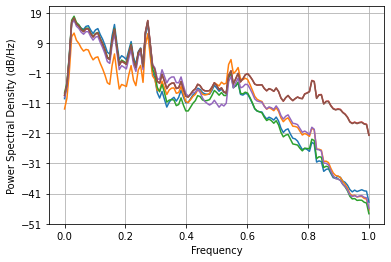

In [17]:
l1 = plt.psd(speech_desired)
l2 = plt.psd(speech_noisy)
l3 = plt.psd(NLMS_output)
#l4 = plt.psd(APA1_output)
l5 = plt.psd(APA2_output)
l6 = plt.psd(APA3_output)
l7 = plt.psd(APA4_output)
#plt.legend(['d(j)_desired','u(j)_noisy','y(j)_NLMS','y(j)_APA1','y(j)_APA2','y(j)_APA3','y(j)_APA4'])